In [2]:
#Para esta actividad se importarán las siguientes librerías:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, ConvLSTM2D, Dropout
from keras.optimizers import Adam

In [3]:
#Código para cargar el Dataset 
#url dataset
url='https://raw.githubusercontent.com/JonathanC1/Datasets/master/TorNonTor/SelectedFeatures-10s-TOR-NonTOR.csv'
#cargar datos en base a la url del dataset
df=pd.read_csv(url,dtype="category")

In [4]:
X = df.drop(['label'], axis = 1)
y = df['label']

In [5]:
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name]= pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name]- min_value)    
    return df

In [6]:
print(df.shape)
dataframe = df.reindex(np.random.permutation(df.index)).copy()
print(dataframe.describe())
print(list(dataframe))

(16088, 29)
        Source IP  Source Port  Destination IP  Destination Port  Protocol  \
count       16088        16088           16088             16088     16088   
unique        267         2301             660              1092         1   
top     10.0.2.15          443       10.0.2.15               443         6   
freq         5290         3054            2894              8072     16088   

        Flow Duration  Flow Bytes/s       Flow Packets/s  Flow IAT Mean  \
count           16088         16088                16088          16088   
unique          14003          7967                14370          14363   
top                38             0  526.315.789.473.684             38   
freq               20          8084                   18             18   

        Flow IAT Std  ...  Bwd IAT Min Active Mean  Active Std  Active Max  \
count          16088  ...        16088       16088       16088       16088   
unique          8900  ...         1655         535           1   

In [7]:
keys = dataframe.keys()
data_to_process = dataframe[keys[4:len(keys) - 1]].copy()
x_normalised = dfNormalize(data_to_process)
print(x_normalised.describe())

        Protocol   Flow Duration   Flow Bytes/s   Flow Packets/s  \
count    16088.0    16088.000000   16088.000000     16088.000000   
mean         0.0        0.442243       0.000295         0.000620   
std          0.0        0.465090       0.012537         0.017354   
min          0.0        0.000000       0.000000         0.000000   
25%          0.0        0.003711       0.000000         0.000000   
50%          0.0        0.077809       0.000000         0.000000   
75%          0.0        0.996548       0.000000         0.000000   
max          0.0        1.000000       1.000000         1.000000   

        Flow IAT Mean   Flow IAT Std   Flow IAT Max   Flow IAT Min  \
count    16088.000000        16088.0   16088.000000   16088.000000   
mean         0.014998            0.0       0.081417       0.007002   
std          0.062858            0.0       0.177617       0.042685   
min          0.000000            0.0       0.000000       0.000000   
25%          0.000000            0.0 

In [8]:
change_labels = lambda x: 1 if x == 'nonTOR' else 0
y_normalised = dataframe['label'].apply(change_labels)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_normalised, y_normalised, test_size = 0.2, random_state=2)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = classifier.predict(X_test)

C:\Users\ELEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [13]:
from sklearn.metrics import classification_report
# reporte de clasificación precision, recall f1-score and accuracy
target_names = ['NonTor', 'Tor']
print(classification_report(y_test,y_pred,target_names = target_names))
cart = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:.2f}".format(classifier.score(X_test, y_test.values)*100))

              precision    recall  f1-score   support

      NonTor       0.99      0.98      0.99      1632
         Tor       0.98      0.99      0.99      1586

    accuracy                           0.99      3218
   macro avg       0.99      0.99      0.99      3218
weighted avg       0.99      0.99      0.99      3218

Accuracy = 98.57


C:\Users\ELEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [14]:
#RL
lr=LogisticRegressionCV() 
lr.fit(X_train, y_train)

C:\Users\ELEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ELEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\ELEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV()

In [15]:
y_pred = lr.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
# reporte de clasificación precision, recall f1-score and accuracy
target_names = ['NonTor', 'Tor']
print(classification_report(y_test,y_pred,target_names=target_names))
rfc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:.2f}".format(lr.score(X_test, y_test.values)*100))

              precision    recall  f1-score   support

      NonTor       0.99      0.97      0.98      1632
         Tor       0.97      0.99      0.98      1586

    accuracy                           0.98      3218
   macro avg       0.98      0.98      0.98      3218
weighted avg       0.98      0.98      0.98      3218

Accuracy = 98.04


In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128,activation='relu',input_shape=(x_normalised.shape[1],1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20,batch_size=32)

Epoch 1/20
403/403 [==============================] - 9s 18ms/step - loss: 0.5521 - accuracy: 0.8820 - val_loss: 0.2403 - val_accuracy: 0.9142
Epoch 2/20
403/403 [==============================] - 6s 15ms/step - loss: 0.2200 - accuracy: 0.9228 - val_loss: 0.1785 - val_accuracy: 0.9397
Epoch 3/20
403/403 [==============================] - 6s 15ms/step - loss: 0.1807 - accuracy: 0.9455 - val_loss: 0.1510 - val_accuracy: 0.9487
Epoch 4/20
403/403 [==============================] - 6s 15ms/step - loss: 0.1568 - accuracy: 0.9526 - val_loss: 0.1272 - val_accuracy: 0.9574
Epoch 5/20
403/403 [==============================] - 6s 15ms/step - loss: 0.1764 - accuracy: 0.9413 - val_loss: 0.1510 - val_accuracy: 0.9444
Epoch 6/20
403/403 [==============================] - 7s 17ms/step - loss: 0.1415 - accuracy: 0.9548 - val_loss: 0.1262 - val_accuracy: 0.9559
Epoch 7/20
403/403 [==============================] - 11s 27ms/step - loss: 0.1213 - accuracy: 0.9627 - val_loss: 0.0896 - val_accuracy: 0.971

In [19]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
#print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test accuracy: 0.978247344493866


In [20]:
#definir el modelo CNN + ConvLSTM
modelo = Sequential()
modelo.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
modelo.add(MaxPooling1D(pool_size=2))
modelo.add(LSTM(32))
modelo.add(Dense(1, activation='sigmoid'))
modelo.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\ELEN\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [21]:
modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20,batch_size=30)

Epoch 1/20
429/429 [==============================] - 5s 7ms/step - loss: 0.2289 - accuracy: 0.9044 - val_loss: 0.1006 - val_accuracy: 0.9683
Epoch 2/20
429/429 [==============================] - 3s 6ms/step - loss: 0.1119 - accuracy: 0.9672 - val_loss: 0.0973 - val_accuracy: 0.9727
Epoch 3/20
429/429 [==============================] - 3s 7ms/step - loss: 0.0981 - accuracy: 0.9721 - val_loss: 0.0776 - val_accuracy: 0.9804
Epoch 4/20
429/429 [==============================] - 4s 9ms/step - loss: 0.0907 - accuracy: 0.9740 - val_loss: 0.0742 - val_accuracy: 0.9782
Epoch 5/20
429/429 [==============================] - 3s 6ms/step - loss: 0.0871 - accuracy: 0.9745 - val_loss: 0.0770 - val_accuracy: 0.9820
Epoch 6/20
429/429 [==============================] - 3s 6ms/step - loss: 0.0818 - accuracy: 0.9767 - val_loss: 0.0654 - val_accuracy: 0.9823
Epoch 7/20
429/429 [==============================] - 3s 7ms/step - loss: 0.0747 - accuracy: 0.9788 - val_loss: 0.0720 - val_accuracy: 0.9770
Epoch 

In [22]:
# Evaluate the model
score = modelo.evaluate(X_test, y_test, verbose=0)
#print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test accuracy: 0.9829086661338806


In [23]:
#set up plotting area
plt.figure(0).clf()

<Figure size 640x480 with 0 Axes>

C:\Users\ELEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


  8/101 [=>............................] - ETA: 0s

C:\Users\ELEN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


101/101 [==============================] - 0s 5ms/step


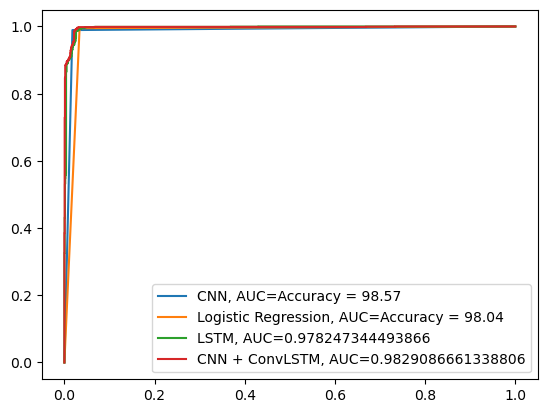

In [29]:
y_pred = classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
CNN = "Accuracy = {:.2f}".format(classifier.score(X_test, y_test.values)*100)
plt.plot(fpr,tpr,label="CNN, AUC="+str(CNN))

y_pred = lr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
LR = "Accuracy = {:.2f}".format(lr.score(X_test, y_test.values)*100)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(LR))

y_pred = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
LSTM = "Accuracy = {:.2f}".format(model.evaluate(X_test, y_test, verbose=0)
plt.plot(fpr,tpr,label="LSTM, AUC="+str(LSTM[1]))

y_pred = modelo.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
CNN_ConvLSTM = modelo.evaluate(X_test, y_test, verbose=0)
plt.plot(fpr,tpr,label="CNN + ConvLSTM, AUC="+str(CNN_ConvLSTM[1]))

plt.legend()

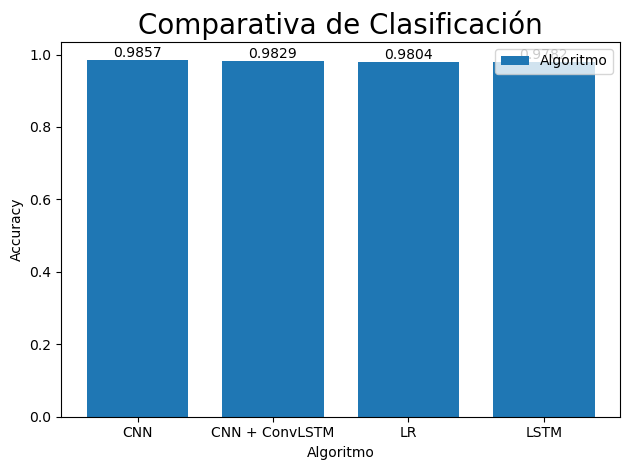

In [33]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla
modelos = []
modelos.append(('CNN', 'Convolutional Neural Network', cart))
modelos.append(('LR', 'Regresion Logistica', rfc))
modelos.append(('LSTM', 'LSTM', LSTM[1]))
modelos.append(('CNN + ConvLSTM', 'CNN + ConvLSTM', CNN_ConvLSTM[1]))

modelos

comparativa = pd.DataFrame(modelos,columns=['Acrónimo', 'Algoritmo', 'Accuracy']).sort_values('Accuracy', ascending=0)
comparativa



#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
ejex = comparativa['Acrónimo']
ejey = round(comparativa['Accuracy'],4) 
num = np.arange(len(ejex))
ancho = 0.75
 
fig, ax = plt.subplots() 
rects1 = ax.bar(num, ejey, ancho, label='Algoritmo')

ax.set_xlabel('Algoritmo')
ax.set_ylabel('Accuracy')
ax.set_title('Comparativa de Clasificación', fontsize=20)
ax.set_xticks(num)
ax.set_xticklabels(ejex)
ax.legend()
 
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 0),
                    textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()

plt.show()